# Geospatial Data in Python with GeoPandas 

## Introduction

The goal of this notebook is to give you an **introduction** to working with geospatial data in Python using the `geopandas` package.  The sample data and use cases are related to a UC Berkeley research a project that I have been working on called **The Louisiana Slave Conspiracies**. This project explores several slave conspiracies that occured in colonial Louisiana during the late 1700s and early 1800s. Since very little data exist for this time period, we begin with an exploration of US Census data from the early 1800s, shortly after the Orleans Territory became part of the United States.

### Assumptions

This tutorial assumptions you have basic working knowledge of Python and of geospatial data.   If you need a geospatial refresher, we can start with this a **very** [Brief Introduction to Geospatial Data](https://docs.google.com/presentation/d/1d9GNcLDsnLxfLmrNRNZE976sHN5qNfkU9Rl2gabUsWc/edit?usp=sharing).

## Setup




### Tutorial Files



The files for this tutorial are located in this github repo: https://github.com/dlab-geo

- The notebook file: **geopandas_intro_lsc.ipynb**

- The data are in the folder **data**


#### Tutorial Notebook
If you are running the notebook locally on your computer you can clone or download the files from github.  

- Then navigate to the folder that contains the notebook file and open it.

If you are running the notebook on **Google Collaboratory** you can open the notebook by clicking on the <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/> badge shown in the Github repo.

- Then, **File > Save in Drive** so you can make and save changes.

#### Tutorial Data

If you downloaded or cloned the github repo to your local computer the data files for this tutorial will be in the **data** folder which should be located in the same folder as the notebook.  If this is the case, set the variable **my_folder** to the current working directory which is referenced as **./**  (a period followed by a forward slash in a linux/unix/MacOS). 

In [11]:
# Where are the notebook files?
my_folder = "./"

If you are working in **Google Collaboratory** you will need to clone the repo into the collaboratory cloud space. This will only store the files temporarily while your session is active.  If this is the case, uncomment the git command below and run the cell.

In [12]:
#Clone the files from Github so that we can access the data directory
#!git clone https://github.com/dlab-geo/geopandas_intro


Take a look at your files with the **ls** command on a mac or in the cloud or **dir()** command on a Windows PC.

In [13]:
!ls
#!ls data
#!ls geopandas_intro
#!ls geopandas_intro/data

LICENSE                          geopandas_intro_lsc.ipynb
README.md                        geoparse_spacy-folium.ipynb
data                             older_versions
environment.yml.bak              requirements.txt
geopandas_intro_lsc-sp2019.ipynb


If you see a **geopandas_intro** folder (directory) then update the value of **my_folder** by uncommenting the line below and executing the code.

In [14]:
# Where are the notebook files?
#my_folder = "./geopandas_intro/"
print(my_folder)

./


###  Geospatial libraries

We will be using a number of libraries that support working with geospatial data in Python, the most important of which is **Geopandas**.

#### GeoPandas

[GeoPandas](http://geopandas.org/) is a relatively new Python for working with geospatial data. In the last few years it has grown more powerful and stable. This really is great because previously it was quite complex to work with geospatial data in Python.  GeoPandas is now the go to package for working with geospatial data. 

`GeoPandas` provides convenient, unified access to the functionality of the [pandas](https://pandas.pydata.org/) package and the functionality provided by a number of lower level spatial data packages including [shapely](https://pypi.python.org/pypi/Shapely) for geometry processing, [fiona](https://pypi.python.org/pypi/Fiona) for spatial data file IO and[ pyproj](https://github.com/jswhit/pyproj) for map projections and coordinate systems.  These libraries should be installed along with Geopandas but if for any reason they are not you can and should manually install them.

We will also be using a few other geospatial libraries including:

- **pysal** for spatial analysis functions such as data classification methods.
- **Descartes** for ploting Shapelygeometric objects with Matplotlib.
- **mplleaflet** for converting matplotlib plots to interactive leaflet web maps

Finally, we will use a number of standard Python libraries including pandas, numpy, and matplotlib.

If you are missing any libraries or you are working in the **Google Collaborary** environment you can install the packages with the following `pip install` commands.

In [15]:
# Install packages need to work with geospatial data objects and methods
#!pip install geopandas                    
#!pip install descartes   
#!pip install pysal 
#!pip install mplleaflet


**Setup complete - you are ready to run!**

## Import libraries

In [16]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mplleaflet

from shapely.wkt import loads
from shapely.geometry import Point, Polygon
import geopandas as gpd
#from geopandas import GeoSeries, GeoDataFrame

In [17]:
import shapely
import rtree
print("geopandas",gpd.__version__)
print("shapely", shapely.__version__)
print("pandas", pd.__version__)
print("rtree", rtree.__version__)
print("numpy", np.__version__)

geopandas 0.4.0
shapely 1.6.4.post2
pandas 0.23.4
rtree 0.8.3
numpy 1.14.2


In [ ]:
# pandas was 0.20
# updating to 0.24 to see if that gets rid of my problems
#!pip install --upgrade pandas==0.23.4
!pip list -o | grep -i geopandas

In [ ]:
#datahub versions
#geopandas 0.3.0 - diff
#shapely 1.6.4 - diff
#pandas 0.23.4  - same
#rtree 0.8.3 - same
#numpy 1.16.0


In [22]:
 osgeo 
osgeo.gdal.VersionInfo()

AttributeError: module 'osgeo' has no attribute 'gdal'

## About the Data 

This tutorial uses historical census data for the USA and the Orleans Territory, most of which is now called Louisiana, that were obtained from the `NHGIS`, or *National Historical Geographic Information System* website ([IPUMS NHGIS, University of Minnesota, www.nhgis.org](https://www.nhgis.org)).  A cartographic boundary file for the United States was obtained from the [US Census website](https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html).

Data for rivers in the US was downloaded from [Natural Earth](https://www.naturalearthdata.com/), a public domain source of mapping data.

Take a look at the data we will use with the **ls** or **dir()** command.

In [ ]:
!ls
#!ls data
#!ls geopandas_intro/data

## Reading in a Spatial Data

Geopandas makes it easy to read in almost any kind of vector data file including the [ESRI Shapefile](https://en.wikipedia.org/wiki/Shapefile) with the [read_file](http://geopandas.org/io.html) command.  You simply put the name of the file in quotes and assign the resulting object to a simple yet informative variable name, here `usa1810`.

In [18]:
#usa1810 = gpd.read_file("data/uscounties_1810.shp")  #US counties in 1810
usa1810 = gpd.read_file(my_folder + "data/uscounties_1810.shp")  #US counties in 1810


The `read_file` command returns a geopandas `GeoDataFrame` object, or `gdf` for short. 

In [19]:
type(usa1810)

geopandas.geodataframe.GeoDataFrame

In [20]:
usa1810.crs

{'init': 'epsg:4326'}

In [21]:
import fiona
print("fiona", fiona.__version__)

fiona 1.8.2


Take a look at the `usa1810` gdf with the **head** command, just like you would look at a `pandas` dataframe. Because it is a pandas dataframe, but with geo super powers! 


In [ ]:
usa1810.head()

#### *Can you identify the name of the column that contains the  coordinate data?*

You can access the  coordinate data directy via the `geometry` column.

In [ ]:
usa1810.geometry.head()


What happens if you access just one geometry?

In [ ]:
usa1810.geometry[3]

### Challenge

How can you display the geometry for the county New York, New York?  

- Hint: take a look at the rows for New York state.

In [ ]:
usa1810[usa1810['STATENAM']=='New York']

# World test

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


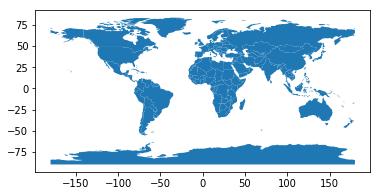

In [4]:
world.plot()

In [6]:
#world2 = world[world['continent']== 'Africa']
world2 = world[['continent', 'geometry']]
world2.head()

,continent,geometry
0,Asia,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Africa,(POLYGON ((16.32652835456705 -5.87747039146621...
2,Europe,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,Asia,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,South America,(POLYGON ((-65.50000000000003 -55.199999999999...


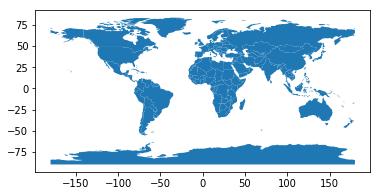

In [7]:
world2.plot()

In [ ]:
#cols = ['pfaf_6', 'pfaf_7', 'geometry']
#hydrobas_ww_p7 = hydrobas_ww[cols].dissolve(by='pfaf_7', aggfunc='first', as_index=False)
#len(hydrobas_ww_p7)

In [8]:
continents = world2.dissolve(by='continent')
continents

,geometry
continent,
Africa,()
Antarctica,()
Asia,()
Europe,()
North America,()
Oceania,()
Seven seas (open ocean),"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
South America,()


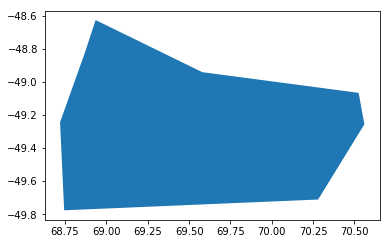

In [9]:
continents.plot()

In [ ]:
# Your code here - display geometry for the county NY, NY
#x=usa1810[usa1810['STATENAM']=='New York']
x=usa1810[['STATENAM','geometry']] #.dissolve(by='STATENAM')
x.head()#y=x.dissolve(by='STATENAM')
#y

In [ ]:
usa1810[usa1810['STATENAM']=='New York'].dissolve

### Challenge

In the cell below, rename the column NHGISNAM to 'county', which is a lot more intuitive!

Hint: here is an example using a hypothetical pandas dataframe.

>`unemployment.rename(columns={'month' : 'year_month'}, inplace=True)`

In [ ]:
# Your code here
#usa1810.rename(...)

usa1810.head()  # check results

## Mapping with GeoPandas

Plot the `usa1810` data with the geopandas **plot** method, which uses `matplotlib` and the matplotlib `pyplot` module under the hood.

In [ ]:
usa1810.plot()

Pretty cool to be able to make a map with a single command.  However, there is always room for improvement. 
You can find out more about the plotting options for basic maps in the [geopandas documentation](http://geopandas.org/mapping.html) and in the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html). 

We can use some options to make a prettier map. Take a minute to consider what each option does.



In [ ]:
# make blue counties pink
usa1810.plot(linewidth=0.25, edgecolor='black', facecolor='pink',  figsize=(14,10))

In [ ]:
usa.cx[]

## Challenge

Let's compare the extent of the USA in 1810 to the USA in 2017.

- Read the file `usa_outline.shp` into a geopandas dataframe named `usa`.
- Then, make a map of the `usa`, setting the `figsize` to (14,10).

In [ ]:
## Your code here

# first read in the file

# then plot the gdf

### Question

Any idea why the map of the plot looks so wide?

In [ ]:
# Let's read in and plot the usa shapefile

#usa = gpd.read_file('data/usa_outline.shp')
usa = gpd.read_file(my_folder + 'data/us_states.shp')
#usa = gpd.read_file("zip://" + my_folder + 'data/usa_border.zip')

usa.plot()

In [ ]:
usa.cx[-150:-50, 25:48].plot()

In [ ]:
# Indexing
#conus = usa.copy()
conus = conus.cx[-150:-50, 25:48].copy()
conus.head()

In [ ]:
print(len(conus.index))
print(len(usa.index))

In [ ]:
conus.plot()

In [ ]:
#conus.reset_index(inplace=True) #data1.reset_index(inplace=True)
conus['country'] = 'usa'
conus.head()

In [ ]:
#ca.dissolve(by='STATE', as_index=False).geometry[0]
conus_outline = conus[["country","geometry"]]
#conus_outline = conus_outline.dissolve(by='country')
conus_outline.geometry.unary_union()

In [ ]:
c2 = us_states.unary_union
c2

## Overlays

A key strength of geospatial data analysis is the ability to overlay data that are located in the same coordinate space. Let's overlay the USA in 1810 on top of the USA in 2017 to visualize the change. Both of these data sets use the same coordinate reference system -  decimal degrees of latitude and longitude referenced to the **World Geodetic System of 1984**, or **WGS84** coordinate reference system (more about that in a minute).

We will explore two methods for doing this, as shown in the [GeoPandas documentation](http://geopandas.org/mapping.html)

In [ ]:
# Method 1. Simple geopandas plot overlay

base = usa.plot(color='white', edgecolor='black',  figsize=(14,10))
usa1810.plot(ax=base)

In [ ]:
# Method 2. Setting Matplot lib options

fig, ax = plt.subplots(1, figsize=(14,10))  # Initialize the plot figure (drawing area) and axes (data area)
ax.set_xlim([-180, -60]) # Set the x axis limit on the axes
ax.set_aspect('equal')   # set the aspect ratio for the x and y axes to be equal. 
                         # This is done automatically in gdf.plot()
    
base = usa.plot(ax=ax, color='black')  # Set the base map, or bottom map layer
usa1810.plot(ax=base, color='white', edgecolor="black")  # draw the data with the base
_ = ax.axis('off') # Don't show the x, y axes and labels in the plot
ax.set_title("USA 2017 and 1810")  # Give the plot a title


## Questions?

If your lost, don't worry. Many folks, myself included, scratch their head and copy matplotlib code, amazed and mystified when it works. Gradually it sinks in. You can expediate the process by reviewing any of a number of good online tutorials, like this one from [DataCamp](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python).

In [ ]:

conus.head()

In [ ]:
conus['country'] = 'usa'
#conus.head()

# Coordinate Reference Systems (CRS) 

Did you notice anything funny about the shape of the USA as mapped above?  How does it differ from this?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Map_of_USA_with_state_names.svg/640px-Map_of_USA_with_state_names.svg.png" width="800px"></img>

Why does it differ? Here's why:

<img src="http://tse3.mm.bing.net/th?id=OIP.lyDmHXX9VdoEOWDQlqppSAHaEy" width="500px"></img>

When we map data encoded with a spheriodal coordinates (longitude & latitude) on a 2D plane like a computer screen we get distortion!

## Map Projections and CRS Transformations

In order to reduce distortion in 2D maps we transform geographic coordinates to projected map coordinates.

- This transformation is also necessary for many geometric operations like area and distance calculations that assume a 2D plane.

The process for transforming a CRS is:

1. Make sure a **crs** is defined for the geopandas dataframe by checking the **crs** property. 
2. If it is not set, you can set it with the **crs** method.
3. Transform it using the **to_crs** method.

In [ ]:
# Check the CRS of our gdfs
print("The CRS of the USA outline geodataframe is: " + str(usa.crs))
print("The CRS of the US1810 counties geodataframe is: " + str(usa1810.crs))

What's an **epsg:4326**?  That's an [EPSG](http://www.epsg.org/) code for the geographic CRS known as the [World Geodectic System of 1984](https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84), or `WGS84`. This is the most commonly used CRS for latitude and longitude coordinate data and is the default CRS for most mapping software when the data does not have a defined CRS.

We can make our map look better by transforming it to a 2D projected `CRS`. A projected CRS applies a mathematical transformation to the data based on a [map projection](https://en.wikipedia.org/wiki/Map_projection)

Common map projections for USA data and their EPSG codes include:

- `Web Mercator` (epsg:3857)
- `USA Contiguious Albers` (epsg:7603)

Let's try these.

In [ ]:
# Transform geographic crs to web mercator
usa_3857 = usa.to_crs(epsg=3857)
usa_3857.plot(figsize=(14,8))

In [ ]:
# Transform geographic crs to USA Contiguous Albers
usa_7603 = usa.to_crs(epsg=7603)
usa_7603.plot(figsize=(14,8))

You can see we get very different maps of the USA depending on the CRS. Web Mercator is best suited for large geographic extents between +-60 degrees (i.e. distortion increases as you move away from equator and towards the poles). USA Contiguous Albers is best for the continental USA.  We could subset the data to remove Alaska, Hawaii and Puerto Rico.

### Important Notes

1. Data need to be in the same CRS in order to be mapped or analyzed together.
2. The units of a CRS are part of the CRS definition. These are typically decimal degrees for geographic (lat/lon) data or meters for projected data.
3. It's not obvious what the best projected CRS is for your map or analysis. You need to review the recent literature (as these things change) and try different ones.  Here is a good starting place, [epsg.io](http://epsg.io/).


> A detailed discussion CRS and map projections is beyond the scope of this notebook. Understanding these, however, is **necessary** for working sucessfully with geospatial data! There are a number of online resources that can be found with a web search to help you get started.

# Mapping Data

By default maps show locations in space. Data maps, also called thematic maps, convey data values at specific locations by associating those values with map symbology like color, shape and size. 

In this section we will explore population data in the `Orleans Territory` from the US Census of 1810.  If you didn't rename the column containing the county names do so now!


In [ ]:
usa1810.rename(columns={'NHGISNAM': 'county'}, inplace=True)
usa1810.head(2)

### Subsetting Geopandas Dataframes

Since we are only interested in the `Orleans Territory` let's subset the `usa1810` data.  Since a geopandas dataframe is a superpowered pandas dataframe we can use pandas methods to subset it. Take another look at the geopandas dataframe to identify the column we can subset the data.

In [ ]:
usa1810.head()

The `STATENAM` column includes a reference to the territory so let's use that.  Then map the result to check it.

In [ ]:
orleans = usa1810[usa1810['STATENAM'] == 'Orleans Territory']
orleans.plot()

Nice! Orleans Territory looks alot like the state of Louisiana.

## Attribute Joins

As we noted above, mapping geometries is useful for getting a sense of the size and relative position of locations. But more often we want to map attribute data that describe a location, such as the population density of a region.

In order to map attribute data we need to have it associated with the locations. However, the geopandas dataframes `usa1810` and `orleans` do not contain any interesting attribute data.

In a separate file named **orleans_census_data1810.csv** we have 1810 population data for the Orleans Territory that was downloaded from the NHGIS.  We can read the file into a `pandas` dataframe and then join the contents of that dataframe to the geopandas dataframe `orleans` based on a column with common data value.  This process is called an `attribute join` and is a common operation when working with geospatial data.

First, read in the population data from the 1810 census that we want to map. 

In [10]:
#orleans_census1810 = pd.read_csv('data/orleans_census_data1810.csv')
orleans_census1810 = pd.read_csv(my_folder + 'data/orleans_census_data1810.csv')

NameError: name 'my_folder' is not defined

In [ ]:
orleans_census1810.head()  # take a look at the data

Compare the **orleans_census1810** dataframe above with the **orleans** geopandas dataframe. What columns do these have in common?

In [ ]:
orleans.head()


Use the geopandas **merge** command to join the two dataframes by the columns with common data values.  Then take a look at the output which we call **orleans_popdata** below.

In [ ]:
# You can read the docs for more guidance on table joins using the merge command
# orleans.merge?

In [ ]:
orleans_popdata = orleans.merge(orleans_census1810, on='GISJOIN')
orleans_popdata.head()

We can now add options to the `plot` command to use data values to determine map symbology. Consider how this is done below with the data in the `nwslave_pop` (non-white slave population) column.

In [ ]:
orleans_popdata.plot(column='nwslave_pop', cmap='Reds', edgecolor='black', legend=True, figsize=(8,6))

Above, the plot option **column=** tells the plot command to use the values in the **nwslave_pop** column to determine the geometry colors based on the colormap specified by the **cmap** option. You can see the list of available [color maps here](https://matplotlib.org/users/colormaps.html). The full range of values in the `nwslave_pop` column is being scaled to the color palette called **Reds**.  This is called an `unclassified` or `classless` map. This map is a good first effort as it imposses no grouping on the data, thus making it easier to spot trends and outliers. But it is harder to interpret the data values within an area. 


A more common practice is to use a classification scheme to bin the data into classes and map those classes to a color palette. Let's try that below with `quantile` classification which is the most commonly used scheme when mapping data.

In [ ]:
orleans_popdata.plot(column='nwslave_pop', cmap='Reds', edgecolor='black', 
                     legend=True, figsize=(8,6), scheme='quantiles')

Wow that gives a very different looking map!

## Challenge

In the code cell below recreate the above map with the classification schemes **equal_interval** and **fisher_jenks** to see how the look of the map changes.

> Bonus challenge: try a different colormap.

In [ ]:
# Your code here

## Choropleth maps

The maps we just made are called `choropleth maps`. A [choropleth maps](https://en.wikipedia.org/wiki/Choropleth_map) is a data map that colors areas by data values.  This are the most common type of data map. It is also sometimes called a **heatmap**.

**HOWEVER**, when the areas being mapped vary in size it is not considered good cartographic practice to map **counts**.  Why do you think this is so?

Instead, choropleth maps typically symbolize ares by densites, ratios or rates that can compared across the different sized areas.

Let's map the ratio of non-white slaves (nwslave_pop) to free whites (white_pop).

In [ ]:
# Create a new column that is the ratio of non-white slaves (nwslave_pop) to free whites (white_pop)
orleans_popdata['slave2white_ratio'] = orleans_popdata['nwslave_pop'] / orleans_popdata['white_pop']

# Map the ratio
orleans_popdata.plot(column='slave2white_ratio', cmap='Reds', edgecolor='black', 
                     legend=True, figsize=(8,6), scheme='quantiles')

We can get fancy with our choropleth maps...

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,12))

orleans_popdata.plot(ax=ax, column='slave2white_ratio', cmap='OrRd', edgecolor='black', legend=True, scheme='fisher_jenks')

for polygon, name in zip(orleans_popdata.geometry, orleans_popdata.COUNTY):
    ax.annotate(xy=(polygon.centroid.x, polygon.centroid.y), s=name)

_ = ax.axis('off')

ax.set_title("Ratio of Non-White Slaves to Free Whites, Orleans Territory, 1810")

Needless to say, labels are a bit tricky, regardless of the software you use to make a map!


### Challenge

In 1791 and 1795 two slave revolts where planned in the same parish in Orleans Territory. Although these plots involved different people and had different orgins, both were discovered and thwarted, leading to the trial and execution or emprisonment of many enslaved persons. Soon thereafter, the [German Coast Uprising of 1811](https://en.wikipedia.org/wiki/1811_German_Coast_uprising), which was the largest slave revolt in US history, occured in a different Orleans parish. Can you use the map above to guess the two parishes in which these three events occured? 

# Mapping Points

Mapping data to polygons is commonly done, but sometimes point maps are preferred. Why? Because when polygons vary greatly in size, as the US states and counties do, the size of the areas can distract from interpretting the data. Large areas pop out and small ones hide in the map.

GeoPandas makes it easy to transform polygon data to point data.

In [ ]:
# First, copy the polygon geodataframe to new geodataframe
orleans_popdata_pts = orleans_popdata.copy()

# Transform the geometry of the new geodataframe from polygons to points
orleans_popdata_pts.geometry = orleans_popdata_pts['geometry'].centroid

# Take a look at the data - especially the values in the geometry column
orleans_popdata_pts.head()

That was relatively easy! Take a look at the format of the data in the **geometry** column above and note how it differs for that of `orleans_popdata`.

Make a quick plot of the data to make sure it looks right.

In [ ]:
orleans_popdata_pts.plot()

To get geographic context, we can plot those points on top of the polygons. Consider the code below for doing this and the resultant plot.

In [ ]:
fig, ax = plt.subplots(1, figsize=(14,14))  # Initialize the plot figure (drawing area) and axes (data area)
fig.patch.set_facecolor('white') # set the plot background to white

ax.set_aspect('equal')   # set the aspect ratio for the x and y axes to be equal. 
                         # This is done automatically in gdf.plot()

    
base = orleans_popdata.plot(ax=ax, facecolor='white', edgecolor='grey', linewidth=0.25,)   
orleans_popdata_pts.plot(ax=base, column='nwslave_pop', cmap='OrRd', edgecolor='black', scheme='fisher_jenks',
                         markersize=80, legend=True,  legend_kwds={'title':'Number of Slaves'})
_ = ax.axis('off')  

for polygon, name in zip(orleans_popdata.geometry, orleans_popdata.COUNTY):
    ax.annotate(xy=(polygon.centroid.x+0.05, polygon.centroid.y), s=name, color='black')
    
ax.set_title("Non-White Slave Population, Orleans Territory, 1810", fontname="Times New Roman",fontweight="bold")

### Challenge

Redo the map above with the data in the column **slave2white_ratio** (the ratio of non-white slaves to whites.)

In [ ]:
## Your Code Here


### Mapping Point Data from a CSV file

We can also read in point data from a **CSV** file. This simple file format is commonly used to store point data when the location is encoded with latitude and longitude values.

Let's read in point data for the locations of the Louisiana slave conspiracies.

In [ ]:
# Read in a csv file that has lat/lon values
lsc_locs = gpd.read_file(my_folder + "data/lsc_points.csv")
 
#take a look at the data
lsc_locs



#### Adding Geometry Data

The **lsc_locs** geopandas dataframe is not complete  - it is missing geometry data.  We can create this from the values in the lat & lon columns.

In [ ]:
# populate geometry column from lat/lon data
lsc_locs['geometry'] = lsc_locs.apply(lambda row: Point(float(row['longitude']), float(row['latitude'])), axis = 1)

# Take a look
lsc_locs


#### Adding a CRS

A geodataframe is not complete without a value for the CRS. Since these data are geographic coordinates we can make the standard assumption (usually correct) that the CRS is **WGS84**, with the EPSG code 4326.

In [ ]:
# Check the crs
print("The CRS of the lsc_locs geodataframe is: " + str(lsc_locs.crs))

# Compare it to a related gpd that has the same CRS
print("The CRS of the orleans geodataframe is: " + str(orleans.crs))

# Define the CRS
lsc_locs.crs = {'init' :'epsg:4326'}

# We could also define it like this
#lsc_locs.crs = orleans.crs

# Check the crs again
print("The CRS of the lsc_locs geodataframe is: " + str(lsc_locs.crs))

We can now plot the locations of the Lousiana slave conspiracies overlayed on top of our county data.

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,12))

orleans_popdata.plot(ax=ax, column='slave2white_ratio', cmap='OrRd', edgecolor='black', scheme='fisher_jenks')

for polygon, name in zip(orleans_popdata.geometry, orleans_popdata.COUNTY):
    ax.annotate(xy=(polygon.centroid.x, polygon.centroid.y), s=name)

lsc_locs.plot(ax=ax, color="black", edgecolor="white", marker=",", linewidth=2, markersize=100)

_ = ax.axis('off')

ax.set_title("Ratio of Non-White Slaves to Free Whites, Orleans Territory, 1810")

The above map confirms our thinking that the parishes with the highest slave to white ratio were  the ones in which the conspiracies took place. But its hard to view the data at this map scale.

### From Static to Interactive Maps with mplleaflet

You can use **mplleaflet** to make a quick interactive Leaflet map from a matplotlib plot.  The results allow you to zoom in and explore the data.  It's quick and simple but but not a very finished web map product. For more customizations, see the Python **folium** library.


In [ ]:
mplleaflet.display(fig=ax.figure, crs=lsc_locs.crs, tiles='cartodb_positron')

## Geometric Manipulations

Geopandas provides a number of methods for querying and manipulating geometries, using the Shapely library under the hood.  Let's consider a few of these that might be helpful in this project.

#### Dissolve

Dissolve is a method for aggregating geometries by a common value. The **usa1810** and **orleans** data represent county boundaries. If we want to display state outlines instead we can **dissolve** the geometries by the values in the **STATENAM** column. 

In [ ]:
orleans_outline = orleans.dissolve(by="STATENAM")
orleans_outline.plot(color="blue")

In [ ]:
# Here is another example of dissolving county data to state boundaries
states1810=usa1810.dissolve(by="STATENAM")
states1810.plot()

#### Area

We can compute the area of a polygon geometry. However, the **CRS** of the gpd should be appropriate for area calculations.


In [ ]:
# What was the area of the Orleans Territory in 1810?
orleans_outline.to_crs(epsg=7603).area / 10**6  # Area in sq kilometers

In [ ]:
# What was the area of US States & Territories in 1810
states1810.to_crs(epsg=7603).area / 10**6  # NY State area in sq kilometers: 141,300 km2 (wikipedia)

### Distance

What is the approximate distance between the slave conspiracy locations and New Orleans?  As with area, geopandas distance calculations require a projected CRS.  For this tutorial we will use the Web Mercator CRS, epsg=3857.

First create objects that represent the center points, or centroids, of each parish.

In [ ]:
# New Orleans center point (centroid)
new_orleans_ctr = orleans_popdata[orleans_popdata['county']=='Orleans'].geometry.centroid
print(new_orleans_ctr)

# Point Coupee center point
pt_coupee_ctr = orleans_popdata[orleans_popdata['county']=='Pointe Coupee'].geometry.centroid
print(pt_coupee_ctr)



Note,  you need to use the **index** to reference the geometry (16 for New Orleans and 1 for Pointe Coupee, shown above) - this makes the code hard to read.  The reason for this is:

- **geometry.centroid** returns an object of type geopandas.geoseriesGeo.Series
- the **distance()** method calculates the distance between two Shapely Point objects - these are within the geoseries object and can be referenced by the index value.

In [ ]:
# Print the different object types
print(type(pt_coupee_ctr))

print(type(pt_coupee_ctr.to_crs(epsg=3857).geometry[1]))

# What does a Shapely Point look like?
print(pt_coupee_ctr.to_crs(epsg=3857).geometry[1])

Now we can calculate the distance between the two points.

In [ ]:
# Calculate the distance in miles
the_dist = pt_coupee_ctr.to_crs(epsg=3857).geometry[1].distance(new_orleans_ctr.to_crs(epsg=3857).geometry[16]) / 1609.344

# print it
print("Pointe Coupee is approximately " + str(the_dist) + " miles north of New Orleans.")

We can also calculate the distance for all rows in a geodatafame.

In [ ]:
# Save the center point (centroid) to make the code more readable
ctr_pt = new_orleans_ctr.to_crs(epsg=3857).geometry[16]

#distances between parish centers and New orleans Centroid
distances = {}
for row in orleans_popdata.to_crs(epsg=3857).iterrows():
  vals = row[1]
  key = vals['county']
  the_geom = vals['geometry'].centroid
  distances[key] = the_geom.distance(ctr_pt) /  1609.344  # distance in miles
print(distances)

### Spatial Relationships

We can query the relationship between geometries to answer questions about location.  For example, let's consider how we would address the spatial query *In what Orleans Territory parishes did the Louisiana slave conspiracies take place?*

In [ ]:
# Take another look at the geodataframe
lsc_locs

In [ ]:
# What county (parish) contains the conspiracy at index 2 (German Coast Uprising)?
orleans[orleans.geometry.contains(lsc_locs.geometry[2])]['county'].get_values()[0]

In [ ]:
# Now do this for all rows in the geodataframe
for row in lsc_locs.iterrows():
  vals = row[1]
  conspiracy = vals['name']
  year = vals['date']
  parish = orleans[orleans.geometry.contains(vals['geometry'])]['county'].get_values()[0]
  print("The " + conspiracy + " took place in " + parish + " Parish in " + year + ".")

## Going Further


### More Geopandas Practice

- Try this [Geopandas tutorial](https://www.datacamp.com/community/tutorials/geospatial-data-python) on plotting the path of Hurricane Florence.

### For a longer course

- Try the datacamp course [Visualizing Geospatial Data in Python](https://www.datacamp.com/courses/visualizing-geospatial-data-in-python), the first chapter is FREE!

### Interactive mapping 

- Try a folium tutorial, there are several online. Find a recent one though as the library has changed a lot in the last  year!


# Summary
We have just touched the tip of the iceberg here in terms of mapping, manipulating and analyzing geospatial data. I hope this encourages you to check out the GeoPandas in more detail and to continue working with geospatial data in Python or in another software tool. Happy mapping!

# Thank you!

---

Created by: Patty Frontiera (pattyf [at] berkeley [dot] edu), on 6/5/2018
    
Last Updated: 11/27/2018